## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): Байкалова Дарья

### Общая информация

__Дата выдачи:__ 08.02.2020

__Дедлайн:__ 18.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [22]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [23]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return int(np.sum(weights * marks))

In [24]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)
assert result_mark(weights, marks) == 8

In [25]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [26]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [27]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [28]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [29]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    array1[abs(array1 - array2) <= precision] = True
    i, = np.where(array1 == True)
    return i

In [30]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [31]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [32]:
def block_matrix(block: np.array) -> np.array:
    a = np.hstack((block, block))
    return np.vstack((a, a))

In [33]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [34]:
def diag_prod(matrix: np.array) -> int:
    d = matrix * np.identity(matrix.shape[0])
    return d[d!=0].prod()

In [35]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])
diag_prod(matrix)
assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [36]:
def normalize(matrix: np.array) -> np.array:
    a = np.mean(matrix, axis=0)
    b = np.std(matrix, axis=0)
    return (matrix - np.vstack(([a] * (matrix.shape[0]))) )/np.vstack(([b] * (matrix.shape[0])))

In [37]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [38]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [39]:
def antiderivative(coefs: np.array) -> np.array:
    a = coefs[::-1]
    b = np.arange(len(coefs))+1
    c = np.hstack(((a / b)[::-1], 0))
    return c

In [40]:
coefs = np.array([4, 6, 0, 1])
assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [41]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [42]:
def make_symmetric(matrix: np.array) -> np.array:
    n = matrix.shape[0]
    a = np.identity(n)
    return matrix.T + matrix - (matrix * a)

In [43]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [44]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [45]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    a = np.arange(b-a+1)+a
    return np.vstack(([a]*m))

In [46]:
m = 5
a = 3
b = 10
assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [47]:
m = 3
a = 2
b = 6
assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)


### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [48]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    m = np.sum(vec1 * vec2)
    lenvec1 = np.sum(vec1 ** 2) ** (1/2)
    lenvec2 = np.sum(vec2 ** 2) ** (1/2)
    return m/(lenvec1*lenvec2)

In [49]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])
assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [50]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [52]:
data = pd.read_csv('train.csv', delimiter=',')
data.shape

(891, 12)

In [53]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

passaengerId - порядковый;
Survived - бинарный;
Pclass - категориальный;
Name - категориальный;
Sex - категориальный;
Age - вещественный;
SibSp - вещественный;
Parch - вещественный;
Ticket - категориальный;
Fare - вещественный;
Cabin - категориальный;
Embarked - категориальный

Задача регрессии - понять, как класс и тип каюты, где ехал пассажир, влияют на то, выжил он или нет
Задача классификации - по данным определить в какой возрастной категории (молодой, средневозрастной или пожилой) находился пассажир (для 177 пассажиров данные отсутствуют). 
Задача кластеризации - разбить людей на классы по социальному положению

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [55]:
data[data['Survived'] == 1].shape[0] / data.shape[0] #Доля выживших

0.3838383838383838

In [56]:
data[(data['Survived'] == 1) & (data['Sex'] == 'male')].shape[0] / data.shape[0] #Доля выживших мужчин

0.122334455667789

In [57]:
data[(data['Survived'] == 1) & (data['Sex'] == 'female')].shape[0] / data.shape[0] #Доля выживших женщин

0.2615039281705948

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [58]:
data['Pclass'].unique() #Виды уникальных классов

array([3, 1, 2], dtype=int64)

In [59]:
data[data['Pclass'] == 1].shape[0] #Количество пассажиров в 1-ом классе

216

In [60]:
data[data['Pclass'] == 2].shape[0] #Количество пассажиров в 2-ом классе

184

In [61]:
data[data['Pclass'] == 3].shape[0] #Количество пассажиров в 3-ем классе (самый многолюдный)

491

In [62]:
if data[(data['Pclass'] == 3) & (data['Sex'] == 'male')].shape[0] / data[data['Pclass'] == 3].shape[0] > 0.5:
    print('male')
else:
    print('female')

male


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [63]:
data['Fare'].min()

0.0

In [64]:
data['Fare'].mean()

32.2042079685746

In [65]:
data['Fare'].max()

512.3292

In [66]:
data[data['Embarked'] == 'S']['Fare'].min()

0.0

In [67]:
data[data['Embarked'] == 'S']['Fare'].mean()

27.07981180124218

In [68]:
data[data['Embarked'] == 'S']['Fare'].max()

263.0

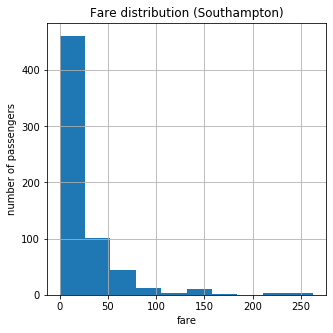

In [69]:
plt.figure(figsize=(5, 5))
plt.title('Fare distribution (Southampton)')
data[data['Embarked'] == 'S']['Fare'].hist()
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

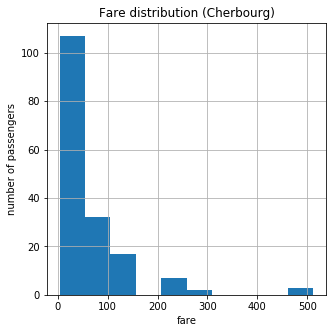

In [70]:
plt.figure(figsize=(5, 5))
plt.title('Fare distribution (Cherbourg)')
data[data['Embarked'] == 'C']['Fare'].hist()
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

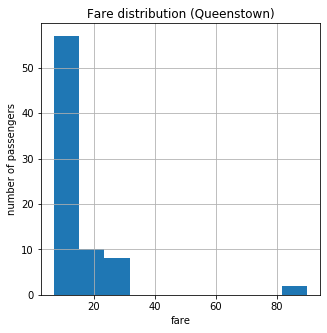

In [71]:
plt.figure(figsize=(5, 5))
plt.title('Fare distribution (Queenstown)')
data[data['Embarked'] == 'Q']['Fare'].hist()
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [72]:
data.drop(['Cabin', 'Ticket'], axis=1).head()
# Номера билетов невозможно сгруппировать и проанализировать
# У многих пассажиров данные номеров кабин отсутствуют (в задаче 17 я нахожу что нет данных о номерах кабин у 687 пассажиров)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [73]:
data.isnull().any().any()

True

In [74]:
data.isnull().any() #Значит, пропуски к столбцах "Age", "Cabin", "Embarked"

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [75]:
data[data['Age'].isnull() == True].shape[0]

177

In [76]:
data[data['Cabin'].isnull() == True].shape[0]

687

In [77]:
data[data['Embarked'].isnull() == True].shape[0]

2

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [112]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [113]:
data['Embarked'].fillna(method='pad', inplace=True) #заполнение пропусков последним известным значением

In [114]:
data['Cabin'].fillna('CAB000', inplace=True)

In [115]:
data.isnull().any().any()

False

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [61]:
data['Fare'].corr(data['Age'])

0.09606669176903887

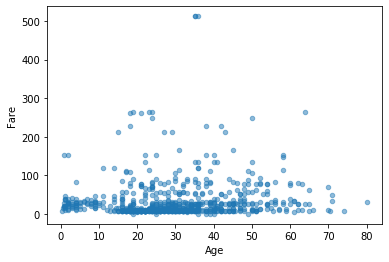

In [62]:
ax1 = data.plot.scatter(x='Age', y='Fare', alpha=0.5)

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [63]:
mean = data['Fare'].mean()
p_expensive_tickets = data[data['Fare'] >= mean]
p_cheap_tickets = data[data['Fare'] < mean]

In [64]:
p_expensive_tickets[p_expensive_tickets['Survived'] == 1].shape[0] / p_expensive_tickets.shape[0]

0.5971563981042654

In [65]:
p_cheap_tickets[p_cheap_tickets['Survived'] == 1].shape[0] / p_cheap_tickets.shape[0]

0.3176470588235294

In [66]:
# Если считать отношение количества выживших в каждом классе к количесву человек в данном классе коэффициентом выживаемости, тогда
# верно что чаще выживали пассажиры с более дорогими билетами (0.597 > 0.318)

In [67]:
data[(data['Survived'] == 1) & (data['Pclass'] == 1)].shape[0] / data[data['Pclass'] == 1].shape[0]

0.6296296296296297

In [68]:
data[(data['Survived'] == 1) & (data['Pclass'] == 2)].shape[0] / data[data['Pclass'] == 2].shape[0]

0.47282608695652173

In [69]:
data[(data['Survived'] == 1) & (data['Pclass'] == 3)].shape[0] / data[data['Pclass'] == 3].shape[0]

0.24236252545824846

In [70]:
data['Survived'].corr(data['Pclass'])

-0.33848103596101475

In [71]:
#Чем выше класс (то есть, чем меньше само значение в колонке 'Class'), тем чаще выживали

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [72]:
data['Relatives'] = data['SibSp'] + data['Parch'] + 1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [154]:
#Поиск самой популярной фамилии на корабле
names = {}
for name in data['Name']:
    word = name.split(',')[0]
    if word not in names:
        names.setdefault(word)
        names[word] = 0
    else:
        names[word] = names.get(word, 0) + 1
maxx = 0
for word in names:
    if names[word] > maxx:
        maxx = names[word]
        k = word
k

'Andersson'

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

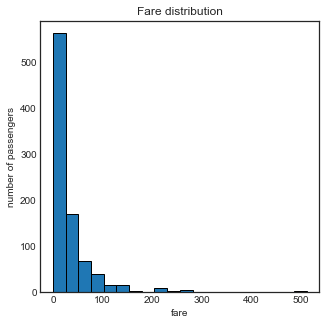

In [155]:
plt.figure(figsize=(5, 5))
plt.title('Fare distribution')
data['Fare'].hist(bins=20, ec='black')
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.grid(axis ='both')
plt.show()

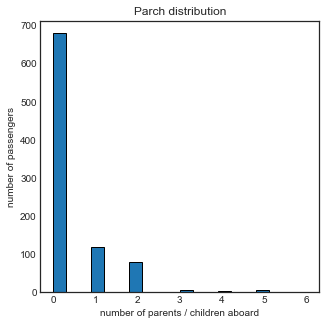

In [126]:
plt.figure(figsize=(5, 5))
plt.title('Parch distribution')
data['Parch'].hist(bins=20, ec='black')
plt.xlabel('number of parents / children aboard')
plt.ylabel('number of passengers')
plt.grid(axis ='both')
plt.show()

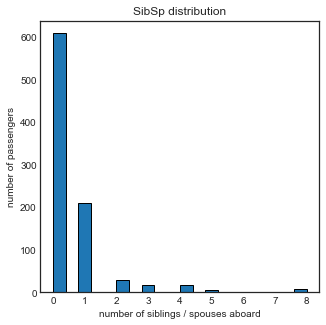

In [157]:
plt.figure(figsize=(5, 5))
plt.title('SibSp distribution')
data['SibSp'].hist(bins=20, ec='black')
plt.xlabel('number of siblings / spouses aboard')
plt.ylabel('number of passengers')
plt.grid(axis ='both')
plt.show()

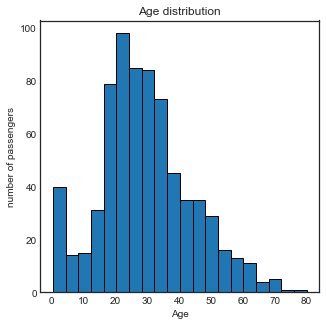

In [160]:
plt.figure(figsize=(5, 5))
plt.title('Age distribution')
data['Age'].hist(bins=20, ec='black')
plt.xlabel('Age')
plt.grid(axis ='both')
plt.ylabel('number of passengers')
plt.show()

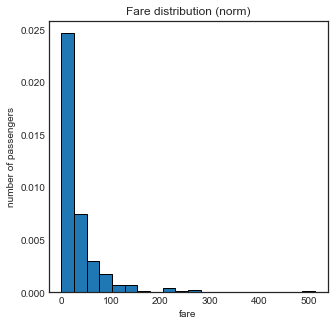

In [135]:
plt.figure(figsize=(5, 5))
plt.title('Fare distribution (norm)')
data['Fare'].hist(density=True, bins=20, ec='black')
plt.xlabel('fare')
plt.ylabel('number of passengers')
plt.grid(axis ='both')
plt.show()

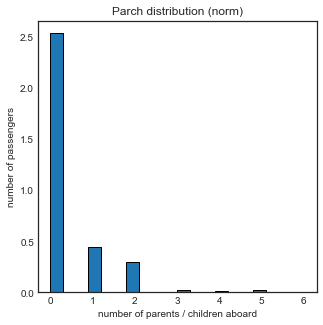

In [136]:
plt.figure(figsize=(5, 5))
plt.title('Parch distribution (norm)')
data['Parch'].hist(density=True,bins=20, ec='black')
plt.xlabel('number of parents / children aboard')
plt.ylabel('number of passengers')
plt.grid(axis ='both')
plt.show()

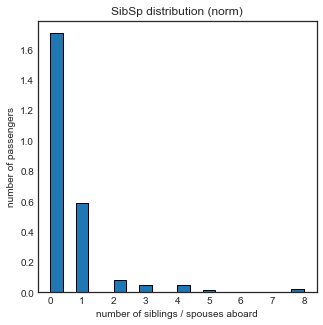

In [137]:
plt.figure(figsize=(5, 5))
plt.style.use('seaborn-white')
plt.title('SibSp distribution (norm)')
data['SibSp'].hist(density=True, bins=20, ec='black')
plt.xlabel('number of siblings / spouses aboard')
plt.ylabel('number of passengers')
plt.grid(axis ='both')
plt.show()

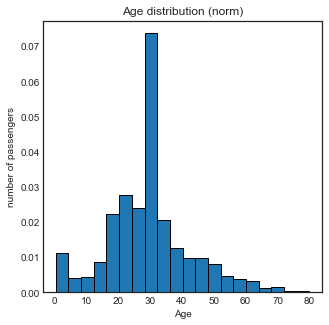

In [139]:
plt.figure(figsize=(5, 5))
plt.style.use('seaborn-white')
plt.title('Age distribution (norm)')
data['Age'].hist(density=True,bins=20, ec='black')
plt.xlabel('Age')
plt.ylabel('number of passengers')
plt.grid(axis ='both')
plt.show()

In [ ]:
#Нормировка нужня для дальшейшей работы с признаками. Как правило, признаки вычисляются в разных единицах и находятся в очень разных числовых значениях, 
#чтобы выводить новые параметры (составленные, например, как линейная комбинация старых), нужно их нормировать

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

# Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

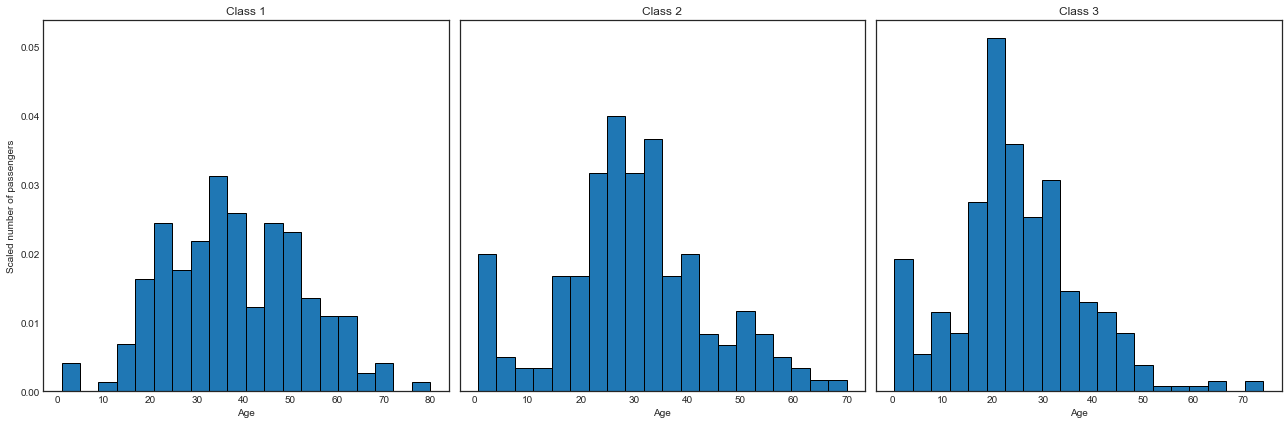

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

fig, dataclass = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(18, 6))
data1class = data[data['Pclass'] == 1]['Age']
data2class = data[data['Pclass'] == 2]['Age']
data3class = data[data['Pclass'] == 3]['Age']

dataclass[0].hist(data1class, bins=20, density=True, ec='black')
dataclass[0].set_ylabel('Scaled number of passengers')
dataclass[0].set_xlabel('Age')
dataclass[0].set_title('Class 1')

dataclass[1].hist(data2class, bins=20, density=True, ec='black')
dataclass[1].set_xlabel('Age')
dataclass[1].set_title('Class 2')


dataclass[2].hist(data3class, bins=20, density=True, ec='black')
dataclass[2].set_xlabel('Age')
dataclass[2].set_title('Class 3')

plt.tight_layout()

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

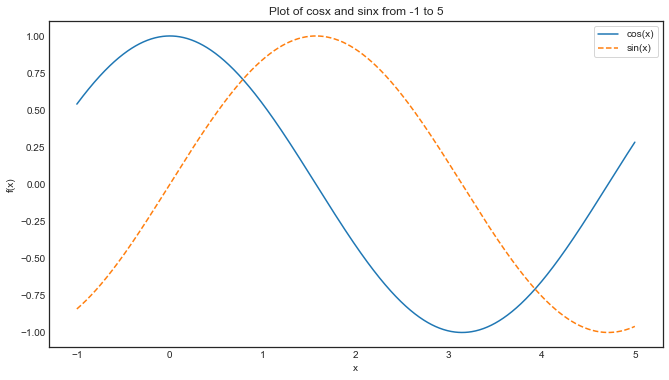

In [90]:
plt.figure(figsize=(11, 6))
x = np.linspace(-1, 5, 1000)
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, np.sin(x), linestyle='dashed',label='sin(x)')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Plot of cosx and sinx from -1 to 5')
plt.xlim(-1, 5)
plt.ylim(-1, 1)
plt.axis('tight')

plt.legend(loc='upper right', frameon=True)
plt.show()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

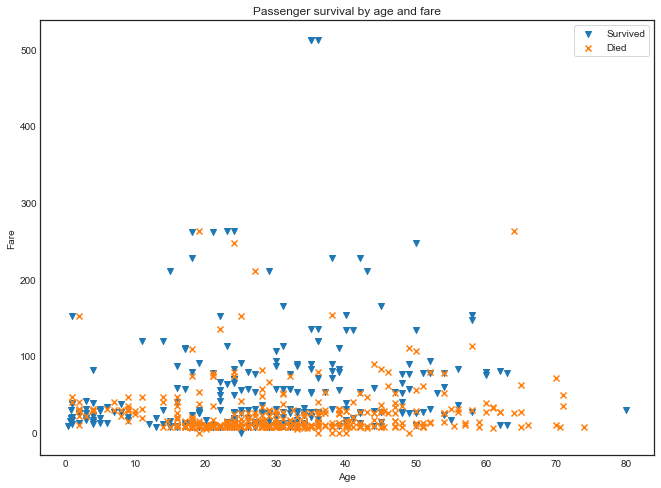

In [88]:
plt.figure(figsize=(11, 8))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Passenger survival by age and fare')

plt.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'], marker='v', label='Survived')
plt.scatter(data[data['Survived']==0]['Age'], data[data['Survived']==0]['Fare'], marker='x', label='Died')
plt.legend(frameon=True)